In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import edhec_risk_kit as erk
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import plotly.express as px
#pd.options.plotting.backend = "plotly"

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


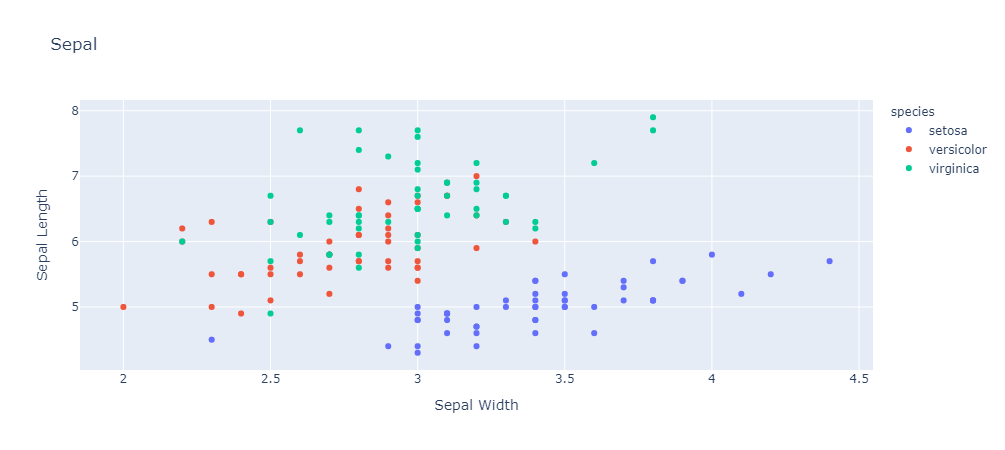

In [14]:
df = px.data.iris()
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', 
                 title='Sepal', labels={'sepal_width':'Sepal Width', 'sepal_length':'Sepal Length'})
#fig.update_layout(hovermode='x unified')
fig.show()

In [5]:
tmi = erk.get_total_market_index_returns()
tmi.head()

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

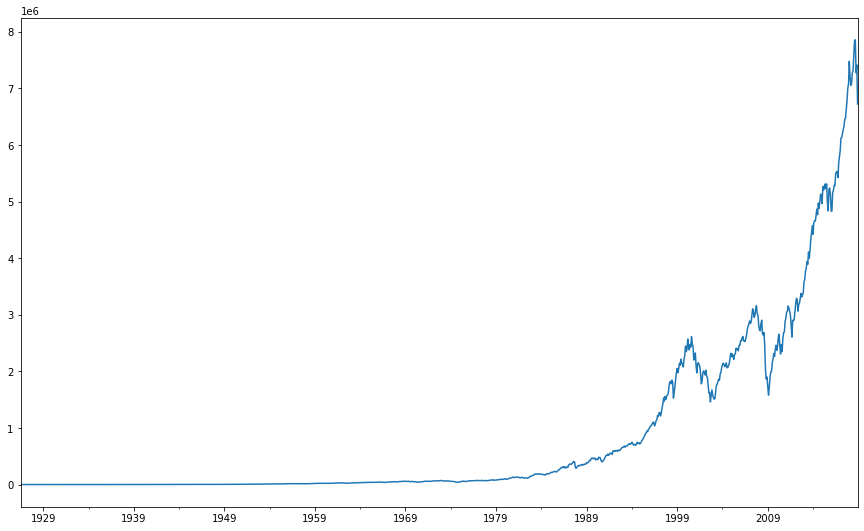

In [18]:
erk.drawdown(tmi)['Wealth'].plot(figsize=(15,9))

In [7]:
erk.drawdown(tmi)

,Wealth,Previous Peak,Drawdown
1926-07,1.031375e+03,1.031375e+03,0.000000
1926-08,1.061241e+03,1.061241e+03,0.000000
1926-09,1.067148e+03,1.067148e+03,0.000000
1926-10,1.036730e+03,1.067148e+03,-0.028504
1926-11,1.065798e+03,1.067148e+03,-0.001265
...,...,...,...
2018-08,7.839752e+06,7.839752e+06,0.000000
2018-09,7.856277e+06,7.856277e+06,0.000000
2018-10,7.272620e+06,7.856277e+06,-0.074292
2018-11,7.410821e+06,7.856277e+06,-0.056701


In [19]:
erk.annualize_rets(tmi, periods_per_year=12)

0.09996421117294352

In [37]:
tmi_yearly = tmi.resample('Y').apply(lambda x: erk.annualize_rets(x, 12))
tmi_yearly.tail(10)

2009    0.297150
2010    0.171350
2011    0.010727
2012    0.161654
2013    0.351476
2014    0.120119
2015   -0.000019
2016    0.128775
2017    0.223014
2018   -0.049672
Freq: A-DEC, dtype: float64

# ERN data 

In [26]:
ern = erk.get_ern_returns()
ern.head()

,SPX-TR,10Y BM,Cash
1871-01,-0.0115,-0.0074,-0.0245
1871-02,0.0144,-0.0036,-0.0094
1871-03,0.0733,0.0540,0.0434
1871-04,0.0518,0.0396,0.0287
1871-05,0.0122,0.0274,0.0211


In [49]:
ern_yearly = ern.resample('Y').apply(lambda x: erk.annualize_rets(x, 12))
ern_yearly['2000':'2018']

,SPX-TR,10Y BM,Cash
2000,-0.044610,0.141913,0.021887
2001,-0.171345,0.048264,0.022198
2002,-0.250855,0.106894,-0.011151
2003,0.323932,0.007054,-0.009898
2004,0.029086,0.016482,-0.014328
2005,0.061138,-0.027767,-0.008092
2006,0.121849,0.003449,0.026960
2007,-0.063252,0.102097,0.001478
2008,-0.385759,0.108011,0.014981
2009,0.316575,-0.053778,-0.024161


In [48]:
tmi_yearly['2000':]

2000   -0.082990
2001   -0.104735
2002   -0.213883
2003    0.312393
2004    0.119427
2005    0.060374
2006    0.154059
2007    0.056964
2008   -0.367358
2009    0.297150
2010    0.171350
2011    0.010727
2012    0.161654
2013    0.351476
2014    0.120119
2015   -0.000019
2016    0.128775
2017    0.223014
2018   -0.049672
Freq: A-DEC, dtype: float64

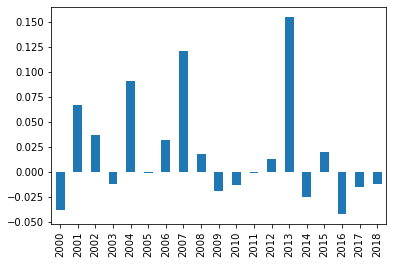

In [47]:
(tmi_yearly - ern_yearly['SPX-TR']['1926':'2018'])['2000':].plot(kind='bar')